# Stability & serialization

A intense effort is done to make all computation reproducible. To reach this goal, numerical stability and serialization are key concepts. We present here a simple procedure to assess such stability through serialization.

## Solve a problem

Let's solve a classical problem like a calibration curve:

In [1]:
import numpy as np
from scifit.solvers import linear

In [2]:
solver = linear.ParabolicFitSolver()

In [3]:
data = solver.synthetic_dataset(sigma=0.015, xmin=1e-4, xmax=1e-2, parameters=[5.63e3, 1.21e2, 2.38], scale_mode="auto")

In [4]:
data.sample(5)

,x0,y,sy,yref,ynoise
id,,,,,
12,0.003855,5630.475425,0.008986,5630.466511,0.008914
26,0.008634,5631.040733,0.008986,5631.044950,-0.004217
15,0.004879,5630.587451,0.008986,5630.590453,-0.003002
23,0.007610,5630.922728,0.008986,5630.920990,0.001738
5,0.001466,5630.170857,0.008986,5630.177333,-0.006475


In [5]:
solution = solver.fit(data)

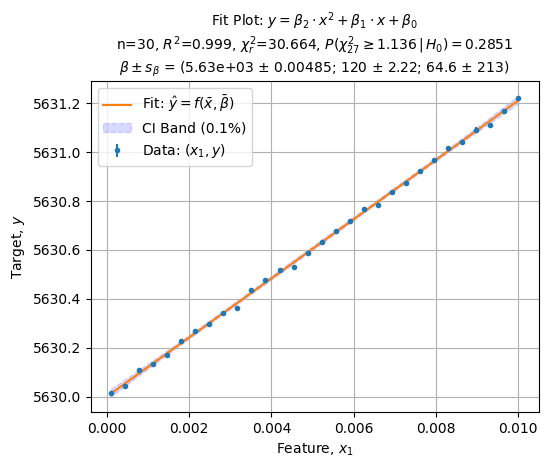

In [6]:
axe = solver.plot_fit()

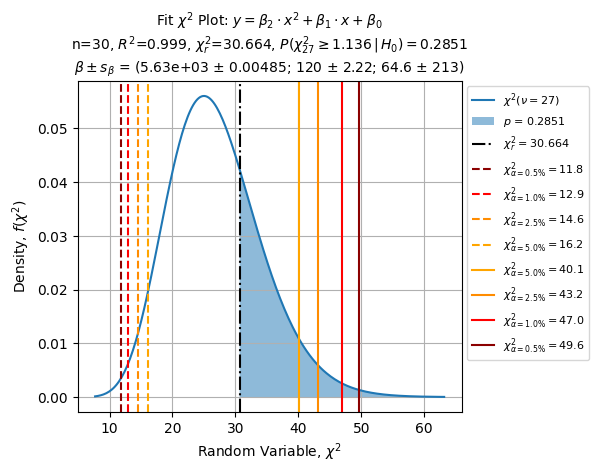

In [7]:
axe = solver.plot_chi_square()

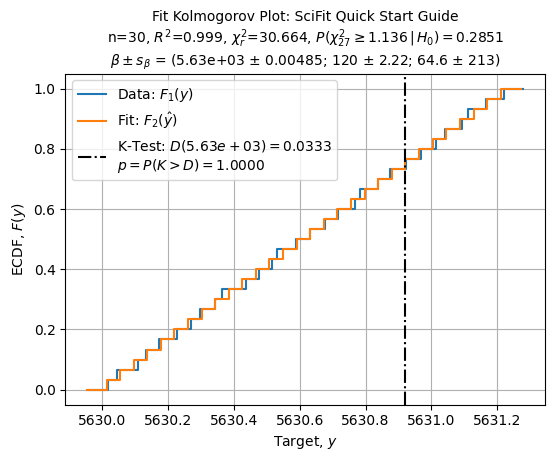

In [8]:
axe = solver.plot_kolmogorov(title="SciFit Quick Start Guide")

## Serialize dataset

Now we serialize the dataset (inputs and regressed quantities):

In [9]:
final = solver.dataset()
final.sample(5)

,x0,y,sy,yhat,yerr,yerrrel,yerrabs,yerrsqr,chi2
id,,,,,,,,,
7,0.002148,5630.267677,0.008986,5630.259972,0.007704,1.368405e-06,0.007704,0.000059,0.735107
20,0.006586,5630.783134,0.008986,5630.796733,-0.013600,-2.415238e-06,0.013600,0.000185,2.290463
4,0.001124,5630.133214,0.008986,5630.136466,-0.003251,-5.774846e-07,0.003251,0.000011,0.130913
25,0.008293,5631.015474,0.008986,5631.003858,0.011617,2.062972e-06,0.011617,0.000135,1.671175
13,0.004197,5630.516391,0.008986,5630.507392,0.008999,1.598309e-06,0.008999,0.000081,1.002952


In [10]:
file = "data/ParabolicRegression.csv"
solver.dump("data/ParabolicRegression.csv", final, summary=False)

## Verification

Now we create a totally new solver that will get those data to perform again the regression. You may remove regressed quantity from the serialized file, as long as input data are present it should perform equally:

In [11]:
solver2 = linear.ParabolicFitSolver()

In [12]:
data2 = solver2.load(file)

In [13]:
solution2 = solver2.fit(data2)

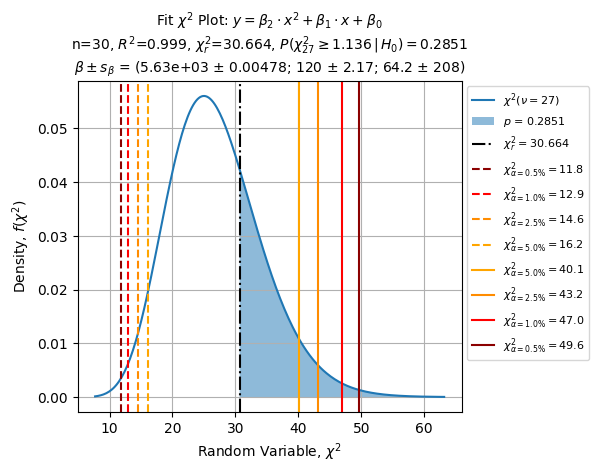

In [14]:
axe = solver2.plot_chi_square()

At a first glance it seems regressions are alike.

### Checking at machine precision

Checking results are the same at the machine precision:

In [15]:
check = solver2.dataset()

In [16]:
final.equals(check)

False

In [17]:
np.allclose(solution["parameters"], solution2["parameters"])

False

Confirms it's possible to reproduce the exact setup, hence it's numercally stable.

### Notice

If such a procedures fails it's likely you have found a bug or more probably that your model is stiff and numerically unstable. Rewriting the model and/or improve the mesures uncertainty may solve the problem.